In [90]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Bidirectional,GRU
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
import datetime
import io
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import sys
import os
# Obtener la ruta del directorio actual
os.chdir('/home/rgadea/experimentos_software_2024')
current_dir = os.getcwd()
print(current_dir)

# Construir la ruta relativa al directorio que quieres agregar
relative_dir = os.path.join(current_dir, 'mis_pkgs/')

# Agregar la ruta relativa al sys.path
sys.path.insert(0, relative_dir)

from MIOPATIA_db import DB_management as db 


/home/rgadea/experimentos_software_2024


Voy a quedarme con los 50 atunes P1 para obtener conjunto de training y validacion

In [91]:
!pwd


/home/rgadea/experimentos_software_2024


In [92]:
filename = "hdf_lomosP2_trainval_filtrado_def_good_ampliado_the_best7.hdf"
with pd.HDFStore(filename,complib="zlib",complevel=4) as hdf_db:
    pre_p_e1  = hdf_db.get('data/pollos_estado')
    pre_p_e1 = pre_p_e1.loc[pre_p_e1['Pollo'] != 0]
    # p_e =pre_p_e1.drop_duplicates(subset = ['Pollo', 'Medida'],  keep = 'last').reset_index(drop = True)
    t    = hdf_db.get('data/tabla')
    X_train=np.zeros((pre_p_e1.shape[0],220,8))
    y_train=np.zeros((pre_p_e1.shape[0],1))
    x=0
    for index, row in pre_p_e1.iterrows():   # El primer registro no se toma en cuenta porque es basura
        Primero = int(row['Primero'])
        Ultimo  = int(row['Ultimo'])
        estado  = int(row['Estado'])
        #print(Primero)
        #print(Ultimo)
        #print(estado)
        if estado == 0 or estado== 1:
            target = 1
        else:
            target = 0
        #target=estado
        pepito=np.array(t.iloc[Primero:Ultimo+1])
        # #print(pepito.shape)
        X_train[x]=pepito[:,3:11]
        #print(X_train[x][0:4,:])       
        y_train[x]=target
        y_train_to_categorical = to_categorical(y_train)
        x=x+1


# print(X_train.shape)
# print(y_train_to_categorical.shape)
# #print(X_train[0:4,:,:])
# #print(X_train[1][0:4][:])
# print(y_train[1:20])
# print(y_train_to_categorical[1:20])
# # #Aqui filtrariamos si hay filas que no nos interesan. En este caso dejo pasar todos los casos
# print(p_e)
# # X_train_filtrado = X_train[2:][:,:]
# # y_train_filtrado = y_train[2:]
X_train_filtrado = X_train
#y_train_filtrado = y_train
y_train_filtrado = y_train_to_categorical

# print(X_train_filtrado.shape)
# print(y_train_filtrado.shape)
# print(X_train_filtrado[0][:,:])
# # # Vamos a normalizar o escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
data_2d = X_train_filtrado.reshape(-1, X_train_filtrado.shape[-1])
normalized_data_2d = scaler.fit_transform(data_2d)
X_train_Normalizado=normalized_data_2d.reshape(X_train_filtrado.shape)
y_train_Normalizado=y_train_filtrado # los valores ya estaban normalizados
print(y_train_Normalizado.shape)

(3168, 2)


In [93]:
filename = "hdf_lomosP2_test_filtrado_def_good.hdf"
with pd.HDFStore(filename,complib="zlib",complevel=4) as hdf_db:
    pre_p_e1  = hdf_db.get('data/pollos_estado')
    pre_p_e1 = pre_p_e1.loc[pre_p_e1['Pollo'] != 0]
    pre_p_e1 =pre_p_e1.drop_duplicates(subset = ['Pollo', 'Medida'],  keep = 'last').reset_index(drop = True)
    t    = hdf_db.get('data/tabla')
    X_test=np.zeros((pre_p_e1.shape[0],220,8))
    y_test=np.zeros((pre_p_e1.shape[0],1))
    x=0
    for index, row in pre_p_e1.iterrows():   # El primer registro no se toma en cuenta porque es basura
        Primero = int(row['Primero'])
        Ultimo  = int(row['Ultimo'])
        estado  = int(row['Estado'])
        #print(Primero)
        #print(Ultimo)
        #print(estado)
        if estado == 0 or estado== 1:
           target = 1
        else:
           target = 0
        #target=estado
        pepito=np.array(t.iloc[Primero:Ultimo+1])
        # #print(pepito.shape)
        X_test[x]=pepito[:,3:11]
        #print(X_train[x][0:4,:])       
        y_test[x]=target
        y_test_to_categorical = to_categorical(y_test)
        x=x+1


# print(X_train.shape)
# print(y_train_to_categorical.shape)
# #print(X_train[0:4,:,:])
# #print(X_train[1][0:4][:])
# print(y_train[1:20])
# print(y_train_to_categorical[1:20])
# # #Aqui filtrariamos si hay filas que no nos interesan. En este caso dejo pasar todos los casos
# print(p_e)
# # X_train_filtrado = X_train[2:][:,:]
# # y_train_filtrado = y_train[2:]
X_test_filtrado = X_test
#y_train_filtrado = y_train
y_test_filtrado = y_test_to_categorical

print(X_test_filtrado.shape)
print(y_test_filtrado.shape)
# print(X_train_filtrado[0][:,:])
# # # Vamos a normalizar o escalar los datos
# concatenamos train y test
#X_total=np.concatenate((X_train_filtrado,X_test_filtrado),axis=0)
#scaler = MinMaxScaler(feature_range=(0, 1))
#data_2d_test = X_total.reshape(-1, X_total.shape[-1])
data_2d_test = X_test_filtrado.reshape(-1, X_test_filtrado.shape[-1])
normalized_data_2d_test = scaler.transform(data_2d_test)


X_test_def=normalized_data_2d_test.reshape(X_test_filtrado.shape) 
# la alternativa es normalizar con el total
# X_test_def=normalized_data_2d_test.reshape(X_test_filtrado.shape) 

y_test_def=y_test_filtrado # los valores ya estaban normalizados
print(X_test_def[0])

(89, 220, 8)
(89, 2)
[[1.45375657e-01 4.74795267e-01 2.80281244e-02 ... 5.25204733e-01
  1.45375842e-01 6.87729402e-01]
 [1.04024516e-01 4.57433188e-01 2.91808316e-02 ... 5.42566812e-01
  1.04024006e-01 6.97578524e-01]
 [8.71835342e-02 4.33210717e-01 3.04208802e-02 ... 5.66789283e-01
  8.71821912e-02 6.95625305e-01]
 ...
 [2.02802467e-04 3.24435285e-01 2.62623498e-02 ... 6.75564715e-01
  2.02784951e-04 7.57016975e-01]
 [1.94554576e-04 3.21521964e-01 2.62630472e-02 ... 6.78478036e-01
  1.94537255e-04 7.57024384e-01]
 [1.86099353e-04 3.17958187e-01 2.62645389e-02 ... 6.82041813e-01
  1.86082165e-04 7.57031614e-01]]


Vamos a hacer los conjuntos de entrenamiento validacion y test

In [94]:
# Divide el dataset en entrenamiento y temporal (test+validación)
# X_temp, X_test_def, y_temp, y_test_def = train_test_split(X_train_Normalizado, y_train_Normalizado, test_size=0.2, stratify=y_train_Normalizado, random_state=42)

# Divide el dataset temporal en validación y test
X_train_def, X_val_def, y_train_def, y_val_def = train_test_split(X_train_Normalizado, y_train_Normalizado, test_size=0.25, stratify=y_train_Normalizado, random_state=42)

# Ahora, X_train, X_val y X_test contienen los datos de entrada para los conjuntos de entrenamiento, validación y prueba, respectivamente.
# y_train, y_val y y_test contienen las clases correspondientes.

In [95]:
print(X_train_def.shape)
print(X_val_def.shape)
print(X_test_def.shape)
print(y_train_def.shape)
print(y_val_def.shape)
print(y_test_def.shape)

(2376, 220, 8)
(792, 220, 8)
(89, 220, 8)
(2376, 2)
(792, 2)
(89, 2)


In [96]:
%load_ext tensorboard

#%tensorboard --logdir logs
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [97]:
def plot_to_image(figure):
    """
    Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call.
    """
    
    buf = io.BytesIO()
    
    # Use plt.savefig to save the plot to a PNG in memory.
    plt.savefig(buf, format='png')
    
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    
    # Use tf.image.decode_png to convert the PNG buffer
    # to a TF image. Make sure you use 4 channels.
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    
    # Use tf.expand_dims to add the batch dimension
    image = tf.expand_dims(image, 0)
    
    return image

In [98]:
def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    threshold = 0.5
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "red" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

In [99]:
factor_aprendizaje=0.001
dimension_LSTM=50
dimension_dense=50
algoritmo='RMSprop'
supermax=8*4
lossfunction='categorical_crossentropy'
def create_model():

    model = Sequential()
    model.add(LSTM(dimension_LSTM, return_sequences=False,input_shape=(220, 8)))
    #model.add(Bidirectional(LSTM(50, return_sequences=True)))
    #model.add(Bidirectional(LSTM(50, return_sequences=True)))
    #model.add(Bidirectional(LSTM(50, return_sequences=False)))
    model.add(Dense(dimension_dense, activation='tanh'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss=lossfunction, optimizer=algoritmo, metrics=['accuracy'])
    model.optimizer.lr=(factor_aprendizaje)
    return model

model=create_model()

In [100]:

experimento="LOMOS_P2yP1_LSTM2_2_clasesfiltrado_{}_dense_onehot_{}_loss_{}_lr_{}_algoritmo_{}".format(dimension_LSTM,dimension_dense,lossfunction,factor_aprendizaje,algoritmo)
logdir="./logs/defs/{}_{}".format(experimento,datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')


In [101]:
class_names=["Buenos","Malos"]

In [102]:
def log_confusion_matrix(epoch, logs):
    
    # Use the model to predict the values from the test_images.
    y_pred = model.predict(X_test_def)
    #y_pred1=y_pred[:,-1]
    y_pred2=y_pred.argmax(axis=1)
    #y_pred2=np.where(y_pred>0,1,0)
    #y_pred2=y_pred2[:,-1]
    #classes = [0, 1, 2, 3, 4] 
    classes = [0, 1]
    y_test_def2=np.argmax(y_test_def,axis=1)  
    #y_test_def2=np.where(y_test_def>0,1,0)
    cm=confusion_matrix(y_test_def2, y_pred2,labels=classes)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    figura = plot_confusion_matrix(cm, class_names=class_names)
    cm_image = plot_to_image(figura)
    
    # Log the confusion matrix as an image summary.
    with file_writer_cm.as_default():
        tf.summary.image("Confusion Matrix", cm_image, step=epoch)

In [103]:
cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)
print(y_train_Normalizado.shape)
print(y_val_def.shape)

(3168, 2)
(792, 2)


In [104]:
# Crear un callback para guardar los mejores pesos
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')


In [119]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=500, verbose=2, mode='auto', baseline=None, restore_best_weights=True)
model.fit(X_train_Normalizado, y_train_Normalizado, epochs=400, batch_size=20, callbacks=[tensorboard_callback,cm_callback,checkpoint, early_stop], validation_data=(X_val_def, y_val_def))
# Final evaluation of the model 
scores = model.evaluate(X_test_def, y_test_def, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/400
3/3 [==============================] - 0s 23ms/step- loss: 0.1207 - accuracy: 0.95

Epoch 1: val_loss did not improve from 0.03128
159/159 [==============================] - 14s 88ms/step - loss: 0.1207 - accuracy: 0.9542 - val_loss: 0.5086 - val_accuracy: 0.8333
Epoch 2/400
3/3 [==============================] - 0s 29ms/step- loss: 0.1424 - accuracy: 0.

Epoch 2: val_loss did not improve from 0.03128
159/159 [==============================] - 14s 88ms/step - loss: 0.1424 - accuracy: 0.9448 - val_loss: 0.2845 - val_accuracy: 0.8927
Epoch 3/400
3/3 [==============================] - 0s 30ms/step- loss: 0.1511 - accuracy: 0.

Epoch 3: val_loss did not improve from 0.03128
159/159 [==============================] - 14s 87ms/step - loss: 0.1511 - accuracy: 0.9448 - val_loss: 0.7003 - val_accuracy: 0.7689
Epoch 4/400
3/3 [==============================] - 0s 35ms/step- loss: 0.1394 - accuracy: 0.

Epoch 4: val_loss did not improve from 0.03128
159/159 [==========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 31ms/step- loss: 0.0877 - accuracy: 0.

Epoch 169: val_loss did not improve from 0.03059
159/159 [==============================] - 16s 98ms/step - loss: 0.0877 - accuracy: 0.9659 - val_loss: 0.0527 - val_accuracy: 0.9773
Epoch 170/400
3/3 [==============================] - 0s 30ms/step- loss: 0.1435 - accuracy: 0.

Epoch 170: val_loss did not improve from 0.03059
159/159 [==============================] - 15s 93ms/step - loss: 0.1435 - accuracy: 0.9473 - val_loss: 0.0517 - val_accuracy: 0.9697
Epoch 171/400
3/3 [==============================] - 0s 27ms/step- loss: 0.0764 - accuracy: 0.

Epoch 171: val_loss did not improve from 0.03059
159/159 [==============================] - 15s 93ms/step - loss: 0.0764 - accuracy: 0.9665 - val_loss: 0.4709 - val_accuracy: 0.8396
Epoch 172/400
3/3 [==============================] - 0s 35ms/step- loss: 0.0726 - accuracy: 0.

Epoch 172: val_loss did not improve from 0.03059
159/159 [==========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 32ms/step- loss: 0.0721 - accuracy: 0.

Epoch 189: val_loss did not improve from 0.02571
159/159 [==============================] - 14s 89ms/step - loss: 0.0721 - accuracy: 0.9684 - val_loss: 0.2366 - val_accuracy: 0.9407
Epoch 190/400
3/3 [==============================] - 0s 30ms/step- loss: 0.1697 - accuracy: 0.

Epoch 190: val_loss did not improve from 0.02571
159/159 [==============================] - 15s 97ms/step - loss: 0.1697 - accuracy: 0.9429 - val_loss: 0.0312 - val_accuracy: 0.9773
Epoch 191/400
3/3 [==============================] - 0s 29ms/step- loss: 0.1976 - accuracy: 0.

Epoch 191: val_loss did not improve from 0.02571
159/159 [==============================] - 14s 89ms/step - loss: 0.1976 - accuracy: 0.9268 - val_loss: 0.0467 - val_accuracy: 0.9886
Epoch 192/400
3/3 [==============================] - 0s 28ms/step- loss: 0.0642 - accuracy: 0.

Epoch 192: val_loss did not improve from 0.02571
159/159 [==========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 36ms/step- loss: 0.2483 - accuracy: 0.

Epoch 207: val_loss did not improve from 0.02352
159/159 [==============================] - 15s 91ms/step - loss: 0.2483 - accuracy: 0.9306 - val_loss: 0.4626 - val_accuracy: 0.8561
Epoch 208/400
3/3 [==============================] - 0s 25ms/step- loss: 0.1712 - accuracy: 0.

Epoch 208: val_loss did not improve from 0.02352
159/159 [==============================] - 14s 91ms/step - loss: 0.1712 - accuracy: 0.9255 - val_loss: 0.0445 - val_accuracy: 0.9735
Epoch 209/400
3/3 [==============================] - 0s 28ms/step- loss: 0.1165 - accuracy: 0.

Epoch 209: val_loss did not improve from 0.02352
159/159 [==============================] - 15s 91ms/step - loss: 0.1165 - accuracy: 0.9561 - val_loss: 0.1837 - val_accuracy: 0.9242
Epoch 210/400
3/3 [==============================] - 0s 28ms/step- loss: 0.1758 - accuracy: 0.

Epoch 210: val_loss did not improve from 0.02352
159/159 [==========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 28ms/step- loss: 0.0925 - accuracy: 0.

Epoch 221: val_loss did not improve from 0.02301
159/159 [==============================] - 14s 89ms/step - loss: 0.0925 - accuracy: 0.9669 - val_loss: 0.0564 - val_accuracy: 0.9798
Epoch 222/400
3/3 [==============================] - 0s 25ms/step- loss: 0.1110 - accuracy: 0.95

Epoch 222: val_loss did not improve from 0.02301
159/159 [==============================] - 15s 95ms/step - loss: 0.1110 - accuracy: 0.9586 - val_loss: 0.3873 - val_accuracy: 0.8750
Epoch 223/400
3/3 [==============================] - 0s 27ms/step- loss: 0.0623 - accuracy: 0.

Epoch 223: val_loss improved from 0.02301 to 0.02202, saving model to best_weights.h5
159/159 [==============================] - 15s 94ms/step - loss: 0.0623 - accuracy: 0.9754 - val_loss: 0.0220 - val_accuracy: 0.9874
Epoch 224/400
  1/159 [..............................] - ETA: 15s - loss: 0.0835 - accuracy: 0.9500

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 33ms/step- loss: 0.0743 - accuracy: 0.

Epoch 224: val_loss improved from 0.02202 to 0.02192, saving model to best_weights.h5
159/159 [==============================] - 15s 95ms/step - loss: 0.0743 - accuracy: 0.9722 - val_loss: 0.0219 - val_accuracy: 0.9886
Epoch 225/400
  1/159 [..............................] - ETA: 18s - loss: 0.0029 - accuracy: 1.0000

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 28ms/step- loss: 0.0779 - accuracy: 0.

Epoch 225: val_loss improved from 0.02192 to 0.02022, saving model to best_weights.h5
159/159 [==============================] - 14s 89ms/step - loss: 0.0779 - accuracy: 0.9729 - val_loss: 0.0202 - val_accuracy: 0.9899
Epoch 226/400
  1/159 [..............................] - ETA: 16s - loss: 0.0024 - accuracy: 1.0000

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 33ms/step- loss: 0.0602 - accuracy: 0.

Epoch 226: val_loss did not improve from 0.02022
159/159 [==============================] - 16s 101ms/step - loss: 0.0602 - accuracy: 0.9735 - val_loss: 0.0382 - val_accuracy: 0.9848
Epoch 227/400
3/3 [==============================] - 0s 28ms/step- loss: 0.0769 - accuracy: 0.

Epoch 227: val_loss did not improve from 0.02022
159/159 [==============================] - 15s 92ms/step - loss: 0.0769 - accuracy: 0.9722 - val_loss: 0.0483 - val_accuracy: 0.9798
Epoch 228/400
3/3 [==============================] - 0s 31ms/step- loss: 0.0797 - accuracy: 0.

Epoch 228: val_loss did not improve from 0.02022
159/159 [==============================] - 15s 95ms/step - loss: 0.0797 - accuracy: 0.9675 - val_loss: 0.0614 - val_accuracy: 0.9785
Epoch 229/400
3/3 [==============================] - 0s 31ms/step- loss: 0.0697 - accuracy: 0.

Epoch 229: val_loss did not improve from 0.02022
159/159 [=========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 28ms/step- loss: 0.0982 - accuracy: 0.

Epoch 233: val_loss did not improve from 0.01898
159/159 [==============================] - 15s 95ms/step - loss: 0.0982 - accuracy: 0.9618 - val_loss: 0.0590 - val_accuracy: 0.9760
Epoch 234/400
3/3 [==============================] - 0s 31ms/step- loss: 0.1103 - accuracy: 0.

Epoch 234: val_loss did not improve from 0.01898
159/159 [==============================] - 15s 95ms/step - loss: 0.1103 - accuracy: 0.9612 - val_loss: 0.0821 - val_accuracy: 0.9760
Epoch 235/400
3/3 [==============================] - 0s 27ms/step- loss: 0.0977 - accuracy: 0.

Epoch 235: val_loss did not improve from 0.01898
159/159 [==============================] - 15s 92ms/step - loss: 0.0977 - accuracy: 0.9621 - val_loss: 0.0320 - val_accuracy: 0.9874
Epoch 236/400
3/3 [==============================] - 0s 33ms/step- loss: 0.0636 - accuracy: 0.

Epoch 236: val_loss did not improve from 0.01898
159/159 [==========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 25ms/step- loss: 0.0505 - accuracy: 0.97

Epoch 276: val_loss did not improve from 0.01872
159/159 [==============================] - 14s 91ms/step - loss: 0.0505 - accuracy: 0.9785 - val_loss: 0.0282 - val_accuracy: 0.9874
Epoch 277/400
3/3 [==============================] - 0s 28ms/step- loss: 0.2175 - accuracy: 0.

Epoch 277: val_loss did not improve from 0.01872
159/159 [==============================] - 15s 92ms/step - loss: 0.2175 - accuracy: 0.9306 - val_loss: 0.1584 - val_accuracy: 0.9482
Epoch 278/400
3/3 [==============================] - 0s 28ms/step- loss: 0.1204 - accuracy: 0.

Epoch 278: val_loss did not improve from 0.01872
159/159 [==============================] - 15s 93ms/step - loss: 0.1204 - accuracy: 0.9561 - val_loss: 0.0421 - val_accuracy: 0.9836
Epoch 279/400
3/3 [==============================] - 0s 33ms/step- loss: 0.0841 - accuracy: 0.

Epoch 279: val_loss did not improve from 0.01872
159/159 [========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 27ms/step- loss: 0.0745 - accuracy: 0.

Epoch 281: val_loss did not improve from 0.01833
159/159 [==============================] - 15s 95ms/step - loss: 0.0745 - accuracy: 0.9722 - val_loss: 0.1623 - val_accuracy: 0.9533
Epoch 282/400
3/3 [==============================] - 0s 31ms/step- loss: 0.0647 - accuracy: 0.

Epoch 282: val_loss did not improve from 0.01833
159/159 [==============================] - 14s 88ms/step - loss: 0.0647 - accuracy: 0.9747 - val_loss: 0.0339 - val_accuracy: 0.9823
Epoch 283/400
3/3 [==============================] - 0s 29ms/step- loss: 0.1039 - accuracy: 0.

Epoch 283: val_loss did not improve from 0.01833
159/159 [==============================] - 14s 89ms/step - loss: 0.1039 - accuracy: 0.9590 - val_loss: 0.0260 - val_accuracy: 0.9899
Epoch 284/400
3/3 [==============================] - 0s 28ms/step- loss: 0.0772 - accuracy: 0.

Epoch 284: val_loss did not improve from 0.01833
159/159 [==========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 24ms/step- loss: 0.0811 - accuracy: 0.97

Epoch 288: val_loss did not improve from 0.01811
159/159 [==============================] - 14s 89ms/step - loss: 0.0811 - accuracy: 0.9757 - val_loss: 0.0705 - val_accuracy: 0.9545
Epoch 289/400
3/3 [==============================] - 0s 26ms/step- loss: 0.0485 - accuracy: 0.

Epoch 289: val_loss did not improve from 0.01811
159/159 [==============================] - 14s 89ms/step - loss: 0.0485 - accuracy: 0.9792 - val_loss: 0.0233 - val_accuracy: 0.9886
Epoch 290/400
3/3 [==============================] - 0s 30ms/step- loss: 0.0491 - accuracy: 0.

Epoch 290: val_loss did not improve from 0.01811
159/159 [==============================] - 15s 92ms/step - loss: 0.0491 - accuracy: 0.9785 - val_loss: 0.4275 - val_accuracy: 0.8611
Epoch 291/400
3/3 [==============================] - 0s 32ms/step- loss: 0.0568 - accuracy: 0.

Epoch 291: val_loss did not improve from 0.01811
159/159 [========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 31ms/step- loss: 0.0340 - accuracy: 0.

Epoch 311: val_loss improved from 0.01802 to 0.01654, saving model to best_weights.h5
159/159 [==============================] - 14s 89ms/step - loss: 0.0340 - accuracy: 0.9817 - val_loss: 0.0165 - val_accuracy: 0.9899
Epoch 312/400
  2/159 [..............................] - ETA: 11s - loss: 0.0208 - accuracy: 0.9750

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 29ms/step- loss: 0.1028 - accuracy: 0.

Epoch 312: val_loss did not improve from 0.01654
159/159 [==============================] - 15s 92ms/step - loss: 0.1028 - accuracy: 0.9665 - val_loss: 0.0275 - val_accuracy: 0.9886
Epoch 313/400
3/3 [==============================] - 0s 29ms/step- loss: 0.0584 - accuracy: 0.

Epoch 313: val_loss did not improve from 0.01654
159/159 [==============================] - 15s 94ms/step - loss: 0.0584 - accuracy: 0.9789 - val_loss: 0.0242 - val_accuracy: 0.9874
Epoch 314/400
3/3 [==============================] - 0s 26ms/step- loss: 0.0531 - accuracy: 0.

Epoch 314: val_loss did not improve from 0.01654
159/159 [==============================] - 14s 88ms/step - loss: 0.0531 - accuracy: 0.9766 - val_loss: 0.7117 - val_accuracy: 0.8194
Epoch 315/400
3/3 [==============================] - 0s 26ms/step- loss: 0.0673 - accuracy: 0.

Epoch 315: val_loss did not improve from 0.01654
159/159 [==========================

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 29ms/step- loss: 0.0410 - accuracy: 0.

Epoch 322: val_loss did not improve from 0.01649
159/159 [==============================] - 14s 89ms/step - loss: 0.0410 - accuracy: 0.9826 - val_loss: 0.0212 - val_accuracy: 0.9899
Epoch 323/400
3/3 [==============================] - 0s 29ms/step- loss: 0.0420 - accuracy: 0.

Epoch 323: val_loss improved from 0.01649 to 0.01588, saving model to best_weights.h5
159/159 [==============================] - 14s 87ms/step - loss: 0.0420 - accuracy: 0.9826 - val_loss: 0.0159 - val_accuracy: 0.9899
Epoch 324/400
  2/159 [..............................] - ETA: 10s - loss: 0.0170 - accuracy: 1.0000

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 32ms/step- loss: 0.0333 - accuracy: 0.

Epoch 324: val_loss improved from 0.01588 to 0.01578, saving model to best_weights.h5
159/159 [==============================] - 15s 91ms/step - loss: 0.0333 - accuracy: 0.9830 - val_loss: 0.0158 - val_accuracy: 0.9899
Epoch 325/400
  2/159 [..............................] - ETA: 10s - loss: 3.2196e-04 - accuracy: 1.0000

/home/rgadea/experimentos_software_2024/envs/tensorflow_2024/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 27ms/step- loss: 0.0453 - accuracy: 0.

Epoch 325: val_loss did not improve from 0.01578
159/159 [==============================] - 15s 95ms/step - loss: 0.0453 - accuracy: 0.9833 - val_loss: 0.0538 - val_accuracy: 0.9747
Epoch 326/400
3/3 [==============================] - 0s 36ms/step- loss: 0.0442 - accuracy: 0.

Epoch 326: val_loss did not improve from 0.01578
159/159 [==============================] - 15s 95ms/step - loss: 0.0442 - accuracy: 0.9820 - val_loss: 0.0452 - val_accuracy: 0.9798
Epoch 327/400
3/3 [==============================] - 0s 27ms/step- loss: 0.0608 - accuracy: 0.

Epoch 327: val_loss did not improve from 0.01578
159/159 [==============================] - 15s 96ms/step - loss: 0.0608 - accuracy: 0.9785 - val_loss: 0.0234 - val_accuracy: 0.9886
Epoch 328/400
3/3 [==============================] - 0s 30ms/step- loss: 0.0473 - accuracy: 0.

Epoch 328: val_loss did not improve from 0.01578
159/159 [==========================

In [138]:
y_pred = model.predict(X_test_def)
#y_pred1=y_pred[:,-1]
y_pred2=np.argmax(y_pred,axis=1)
#y_pred2=np.where(y_pred>0,1,0)
#y_pred2=y_pred2[:,-1]
y_test_def2=np.argmax(y_test_def,axis=1)
#y_test_def2=np.where(y_test_def>0,1,0)
print(y_pred.shape)
print(y_pred2.shape)
print(y_test_def2.shape)
#print(y_test_def[25])
print(y_pred2)

3/3 [==============================] - 0s 31ms/step
(89, 2)
(89,)
(89,)
[1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0]


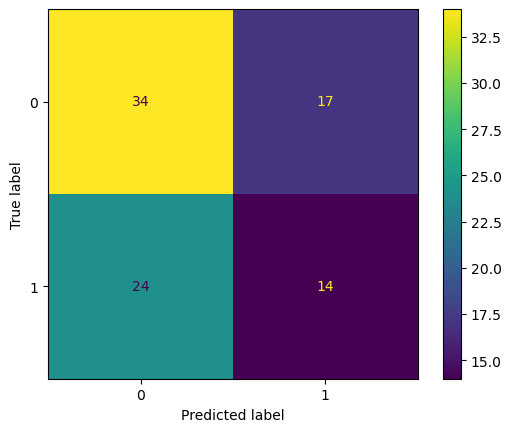

In [139]:
#docs_infra: no_execute
classes = [0, 1, 2, 3, 4]
classes = [0, 1]
cm=confusion_matrix(y_test_def2, y_pred2,labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [140]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test_def2, y_pred2, target_names=target_names, digits=4))

              precision    recall  f1-score   support

     class 0     0.5862    0.6667    0.6239        51
     class 1     0.4516    0.3684    0.4058        38

    accuracy                         0.5393        89
   macro avg     0.5189    0.5175    0.5148        89
weighted avg     0.5287    0.5393    0.5308        89



In [141]:
# model.save('modelos/modelote1203_200')  # creates a HDF5 file 'my_model.h5'

In [142]:
model.save('modelos/modelo_perfecto_{}_{}'.format(experimento,datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))) 

INFO:tensorflow:Assets written to: modelos/modelo_perfecto_LOMOS_P2yP1_LSTM2_2_clasesfiltrado_50_dense_onehot_50_loss_categorical_crossentropy_lr_0.001_algoritmo_RMSprop_20240523-065843/assets


INFO:tensorflow:Assets written to: modelos/modelo_perfecto_LOMOS_P2yP1_LSTM2_2_clasesfiltrado_50_dense_onehot_50_loss_categorical_crossentropy_lr_0.001_algoritmo_RMSprop_20240523-065843/assets


In [143]:
from scipy import stats
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_def)
#y_pred2 = scaler_out.inverse_transform(y_pred) #valor denormalizado

#y_pred1=y_pred[:,-1]
y_pred2=np.argmax(y_pred,axis=1)
n = len(y_pred2)
reshaped = y_pred2[:n//4*4].reshape(-1, 4)
mean_values = reshaped.mean(axis=1)

mean_values = np.round(mean_values)
mean_values = np.clip(mean_values, 0, 4)
mean_values = mean_values.astype(int)
print(mean_values)

mode_values = stats.mode(reshaped, axis=1)[0]
print(mode_values)

# Convierte los arrays a DataFrames
mean_df = pd.DataFrame(mean_values, columns=['mean'])
mode_df = pd.DataFrame(mode_values, columns=['mode'])

# Guarda los DataFrames en archivos Excel
mean_df.to_excel("clasificacion_P1P2_mean_best7.xlsx", index=False)
mode_df.to_excel("clasificacion_P1_mode_best7.xlsx", index=False)

3/3 [==============================] - 0s 31ms/step
[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [144]:
print(y_pred2)

[1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0]


In [145]:
filename5 = "lomosP1_20240430_clasificado_experto.hdf"
with pd.HDFStore(filename5,complib="zlib",complevel=4) as hdf_db:
    pre_p_e2  = hdf_db.get('data/pollos_estado')
    pre_p_e2 = pre_p_e2.loc[pre_p_e2['Pollo'] != 0]
    pre_p_e2 =pre_p_e2.drop_duplicates(subset = ['Pollo', 'Medida'],  keep = 'last').reset_index(drop = True)
    t    = hdf_db.get('data/tabla')
    X_test2=np.zeros((pre_p_e2.shape[0],220,8))
    y_test2=np.zeros((pre_p_e2.shape[0],1))
    x=0
    for index, row in pre_p_e2.iterrows():   # El primer registro no se toma en cuenta porque es basura
        Primero = int(row['Primero'])
        Ultimo  = int(row['Ultimo'])
        estado  = int(row['Estado'])
        #print(Primero)
        #print(Ultimo)
        #print(estado)
        if estado == 0 or estado== 1:
           target = 1
        else:
           target = 0
        #target=estado
        pepito=np.array(t.iloc[Primero:Ultimo+1])
        # #print(pepito.shape)
        X_test2[x]=pepito[:,3:11]
        #print(X_train[x][0:4,:])       
        y_test2[x]=target
        y_test2_to_categorical = to_categorical(y_test2)
        x=x+1


# print(X_train.shape)
# print(y_train_to_categorical.shape)
# #print(X_train[0:4,:,:])
# #print(X_train[1][0:4][:])
# print(y_train[1:20])
# print(y_train_to_categorical[1:20])
# # #Aqui filtrariamos si hay filas que no nos interesan. En este caso dejo pasar todos los casos
# print(p_e)
# # X_train_filtrado = X_train[2:][:,:]
# # y_train_filtrado = y_train[2:]
X_test2_filtrado = X_test2
#y_train_filtrado = y_train
y_test2_filtrado = y_test2_to_categorical

print(X_test2_filtrado.shape)
print(y_test2_filtrado.shape)
# print(X_train_filtrado[0][:,:])
# # # Vamos a normalizar o escalar los datos
# concatenamos train y test
#X_total=np.concatenate((X_train_filtrado,X_test_filtrado),axis=0)
#scaler = MinMaxScaler(feature_range=(0, 1))
#data_2d_test = X_total.reshape(-1, X_total.shape[-1])
data_2d_test = X_test2_filtrado.reshape(-1, X_test2_filtrado.shape[-1])
normalized_data_2d_test = scaler.transform(data_2d_test)


X_test2_def=normalized_data_2d_test.reshape(X_test2_filtrado.shape) 
# la alternativa es normalizar con el total
# X_test_def=normalized_data_2d_test.reshape(X_test_filtrado.shape) 

y_test2_def=y_test2_filtrado # los valores ya estaban normalizados

print(y_test2_def.shape)

print(y_test2_filtrado)

(200, 220, 8)
(200, 2)
(200, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 

In [146]:
from scipy import stats
from sklearn.metrics import classification_report

# Crear un nuevo modelo con la misma arquitectura
best_val_model = create_model()  # Reemplaza esto con la función que usaste para crear el modelo original

# Cargar los mejores pesos
best_val_model.load_weights('best_weights.h5')

y_pred = best_val_model.predict(X_test2_def)
#y_pred2 = scaler_out.inverse_transform(y_pred) #valor denormalizado

#y_pred1=y_pred[:,-1]
y_pred2=np.argmax(y_pred,axis=1)
n = len(y_pred2)
print(n)
reshaped = y_pred2[:n//4*4].reshape(-1, 4)
mean_values = reshaped.mean(axis=1)

mean_values = np.round(mean_values)
mean_values = np.clip(mean_values, 0, 4)
mean_values = mean_values.astype(int)
print(mean_values.shape)

mode_values = stats.mode(reshaped, axis=1)[0]
print(mode_values.shape)

n = len(y_test2_def)
y_test2_def2=np.argmax(y_test2_def,axis=1)
print(y_test_def2.shape)
print(n)
reshaped2 = y_test2_def2[:n//4*4].reshape(-1, 4)
target_mean_values = reshaped2.mean(axis=1)

target_mean_values = np.round(target_mean_values)
target_mean_values = np.clip(target_mean_values, 0, 4)
target_mean_values = target_mean_values.astype(int)
print(target_mean_values.shape)

target_mode_values = stats.mode(reshaped2, axis=1)[0]
print(target_mode_values.shape)
print(reshaped)
print(mode_values)
print(target_mean_values)

7/7 [==============================] - 1s 25ms/step
200
(50,)
(50,)
(89,)
200
(50,)
(50,)
[[1 0 0 0]
 [0 0 1 1]
 [0 1 0 1]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 1 0]
 [0 0 0 0]
 [1 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 1 1 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 1 1]
 [1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 1 0 1]
 [0 0 0 0]
 [0 1 0 0]
 [1 0 1 1]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 [1 0 0 0]
 [1 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 1 1]
 [0 0 0 0]
 [1 0 1 0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0]
[1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0
 1 1 1 0 1 0 1 1 0 0 1 1 0]


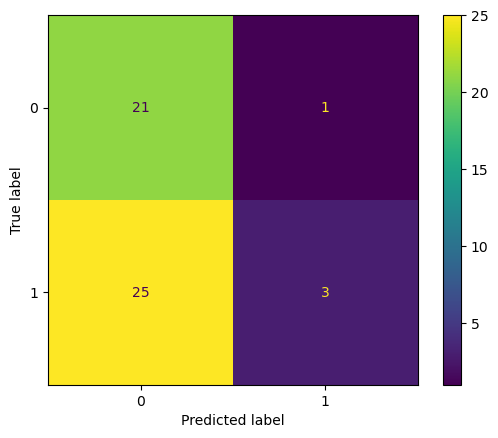

In [147]:
#docs_infra: no_execute
classes = [0, 1, 2, 3, 4]
classes = [0, 1]
cm=confusion_matrix(target_mean_values, mean_values,labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [148]:
print(cm.diagonal()/cm.sum(axis=1))

[0.95454545 0.10714286]


In [149]:
target_names = ['class 0', 'class 1']
print(classification_report(target_mean_values, mean_values, target_names=target_names, digits=4))

              precision    recall  f1-score   support

     class 0     0.4565    0.9545    0.6176        22
     class 1     0.7500    0.1071    0.1875        28

    accuracy                         0.4800        50
   macro avg     0.6033    0.5308    0.4026        50
weighted avg     0.6209    0.4800    0.3768        50

